# install and import

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351210 sha256=e486c1ee532be25a5f67697d63e4117082d21adec96dc265246d9274c86eda48
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa08711819357e6de0c5fe67b874671141413565
Successfully built emoji


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import emoji
import nltk

In [ ]:
plt.rcdefaults() #defaults values for plt
plt.figure(dpi=300) #increase quality for plt

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

# DATA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final.csv') # Read Final dataset

In [ ]:
df.shape #dataset dimentions

(27774, 2)

In [ ]:
df.head() #first five

,sentiment,text
0,negative,فرنسيه تاعك طربڨ 😅 😅فات شهر والو
1,negative,واش انتم ولاد فرنسا
2,negative,قنوات الجزاير بدون ترجمه نتوما خير سبوره والله...
3,negative,جاز شهر ماكانش الاسعار كيما قلتو علاه تكذبو
4,negative,اللغه الفرنسيه تجري عروقهم لاحول قوه الا بالله


In [ ]:
df=df.dropna() #drop null values

In [ ]:
df.text=df.text.astype(str) #text column to string

<ipython-input-9-8a4fbac2d75a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text=df.text.astype(str) #text column to string


In [ ]:
df = df.drop_duplicates() #keep only one sentence

In [ ]:
df.shape

(27571, 2)

In [ ]:
df['sentiment'].value_counts()

negative    12081
neutral      8186
positive     7304
Name: sentiment, dtype: int64

In [ ]:
total = len(df["text"].values)
total

27571

# Sentiment distribution

43.817779421806335
29.690617322921753
26.49160325527191


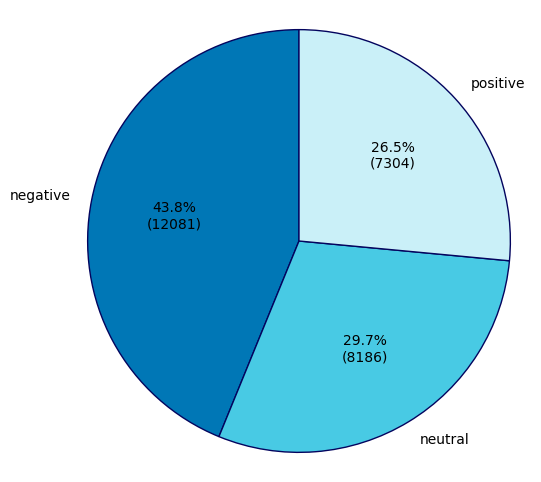

In [ ]:
plt.figure(figsize=(6, 6))
def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

colors =["#0077b6","#48cae4","#caf0f8"]
plt.pie(df['sentiment'].value_counts() , labels=df['sentiment'].value_counts().index , colors=colors, autopct=my_fmt,wedgeprops={'linewidth': 1, 'edgecolor': '#03045e'} , startangle=90)
plt.axis('equal')
plt.savefig('sentiment_distribution.png',dpi=300)
plt.show()
plt.close()

# balanced data

In [ ]:
positive_sentences = df[df['sentiment'] == "positive"]
negative_sentences = df[df['sentiment'] == "negative"]
neutral_sentences = df[df['sentiment'] == "neutral"]

In [ ]:
min_sentences = min(len(positive_sentences), len(negative_sentences), len(neutral_sentences))

In [ ]:
min_sentences

7304

In [ ]:
positive_sentences['length'] = positive_sentences['text'].str.len()
negative_sentences['length'] = negative_sentences['text'].str.len()
neutral_sentences['length'] = neutral_sentences['text'].str.len()

<ipython-input-18-f93ac7b0ac5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_sentences['length'] = positive_sentences['text'].str.len()
<ipython-input-18-f93ac7b0ac5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentences['length'] = negative_sentences['text'].str.len()
<ipython-input-18-f93ac7b0ac5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
positive_sentences.sort_values('length', ascending=False, inplace=True)
negative_sentences.sort_values('length', ascending=False, inplace=True)
neutral_sentences.sort_values('length', ascending=False, inplace=True)

<ipython-input-19-c4d3a7e1780b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_sentences.sort_values('length', ascending=False, inplace=True)
<ipython-input-19-c4d3a7e1780b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentences.sort_values('length', ascending=False, inplace=True)
<ipython-input-19-c4d3a7e1780b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral_sentences.sort_values('length', ascending=Fa

In [ ]:
positive_balanced = positive_sentences[:min_sentences]
negative_balanced = negative_sentences[:min_sentences]
neutral_balanced = neutral_sentences[:min_sentences]

In [ ]:
balanced_dataset = pd.concat([positive_balanced, negative_balanced, neutral_balanced])

In [ ]:
df = balanced_dataset.drop(['length'], axis=1)

In [ ]:
df.sentiment.value_counts()

positive    7304
negative    7304
neutral     7304
Name: sentiment, dtype: int64

In [ ]:
total = len(df["text"].values)

33.33333432674408
33.33333432674408
33.33333432674408


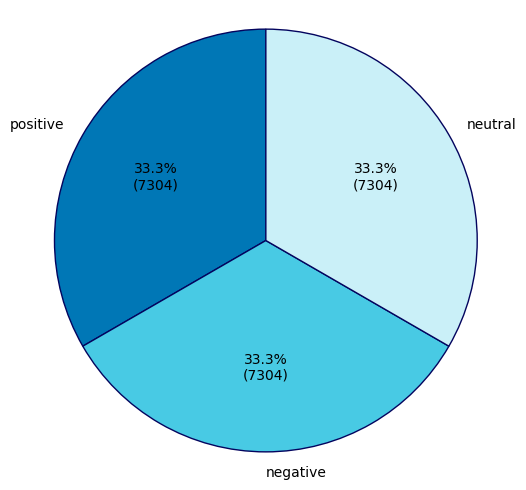

In [ ]:
plt.figure(figsize=(6, 6))
def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

colors =["#0077b6","#48cae4","#caf0f8"]
plt.pie(df['sentiment'].value_counts() , labels=df['sentiment'].value_counts().index , colors=colors, autopct=my_fmt,wedgeprops={'linewidth': 1, 'edgecolor': '#03045e'} , startangle=90)
plt.axis('equal')
plt.savefig('balanced.png',dpi=300)
plt.show()

In [ ]:
# Saving the pie chart as an image file
plt.savefig('sentiment_distribution.jpg',dpi=300)
plt.close()

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/FinalBalanced.csv", encoding='utf-8',index=False)

# Emoji

In [ ]:
# Count the sentences containing emojis
sentences_with_emojis = df["text"].apply(lambda x: any(char in emoji.EMOJI_DATA for char in x))
# Calculate the percentage
emoji_percentage = sentences_with_emojis.mean() * 100

In [ ]:
sentences_with_emojis.value_counts()

False    19630
True      2282
Name: text, dtype: int64

In [ ]:
emoji_percentage

10.414384811975173

89.58561420440674
10.414385050535202


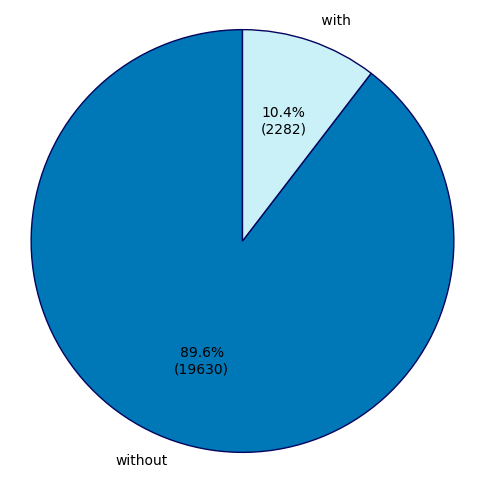

In [ ]:
plt.figure(figsize=(6, 6))
def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

colors =["#0077b6","#48cae4","#caf0f8"]
plt.pie(sentences_with_emojis.value_counts() , labels=["without"," with"], colors=colors, autopct=my_fmt,wedgeprops={'linewidth': 1, 'edgecolor': '#03045e'} , startangle=90)
plt.axis('equal')
plt.savefig('emoji_percentage.png',dpi=300)

plt.show()

# Letters

In [ ]:
# Initialize counters
arabic_count = 0
latin_count = 0
mixed_count = 0

texts = df['text'].values

# Count the occurrence of each letter type
for text in texts:
    if any(char.isalpha() and char.isascii() for char in text):
        latin_count += 1
    elif any(char.isalpha() and not char.isascii() for char in text):
        arabic_count += 1
    else:
        mixed_count += 1

# Calculate the percentage
total_count = len(texts)
arabic_percentage = (arabic_count / total_count) * 100
latin_percentage = (latin_count / total_count) * 100
mixed_percentage = (mixed_count / total_count) * 100


75.41073560714722
24.105513095855713
0.4837532062083483


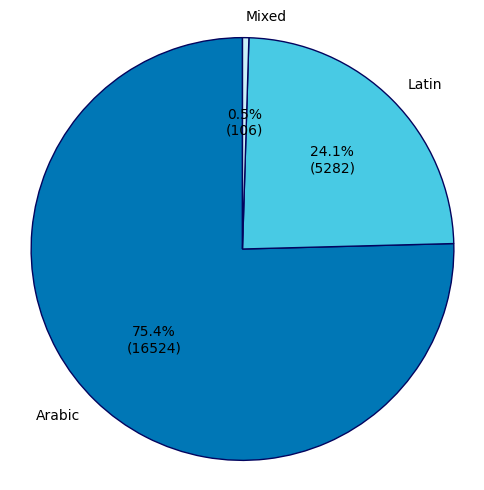

In [ ]:
plt.figure(figsize=(6, 6))
def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

colors =["#0077b6","#48cae4","#caf0f8"]
plt.pie([arabic_count, latin_count, mixed_count] , labels=labels, colors=colors, autopct=my_fmt,wedgeprops={'linewidth': 1, 'edgecolor': '#03045e'} , startangle=90)
plt.axis('equal')
plt.savefig('letter_percentage.png',dpi=300)
plt.show()

# unigrams

In [ ]:
all_tokens = [word for text in df['text'] for word in text.split()]

In [ ]:
# Generate unigrams for each label
label_unigrams = {}
for label in df['sentiment'].unique():
    label_tokens = [word for text in df.loc[df['sentiment'] == label, 'text'] for word in text.split()]
    label_unigrams[label] = nltk.FreqDist(label_tokens)

In [ ]:
all_unigrams = nltk.FreqDist(all_tokens)

In [ ]:
top_unigrams_df = pd.DataFrame(index=range(10))  # Set the index range
for label, unigrams in label_unigrams.items():
    top_unigrams = unigrams.most_common(10)
    unigram_column = [unigram for unigram, _ in top_unigrams]
    frequency_column = [freq for _, freq in top_unigrams]
    top_unigrams_df[label] = unigram_column
    top_unigrams_df[label + ' Frequency'] = frequency_column

In [ ]:
# Add a column for the unigrams of the entire dataset
top_unigrams_df['Entire Dataset'] = [unigram for unigram, _ in all_unigrams.most_common(10)]
top_unigrams_df['Entire Dataset Frequency'] = [freq for _, freq in all_unigrams.most_common(10)]

In [ ]:
top_unigrams_df

,positive,positive Frequency,negative,negative Frequency,neutral,neutral Frequency,Entire Dataset,Entire Dataset Frequency
0,الله,2764,الله,1218,علي,800,الله,4763
1,ربي,1677,مليون,1126,الله,781,علي,2802
2,خويا,1353,علي,1104,؟,703,ربي,2354
3,فيك,987,سياره,836,مليون,625,خويا,2114
4,علي,898,والله,664,خويا,622,مليون,1868
5,يحفظك,795,هه,659,سياره,476,سياره,1549
6,اخي,621,السيارات,639,اخي,359,؟,1301
7,بارك,621,الشعب,574,السيارات,327,فيك,1143
8,يبارك,569,؟,556,الجزاءر,287,السيارات,1094
9,شكرا,525,السوق,522,?,286,اخي,1092


In [ ]:
top_unigrams_df.to_excel('unigrams.xlsx', index=False)

# Bigrams

In [ ]:
# Tokenize the entire dataset
all_tokens = [word for text in df['text'] for word in text.split()]

# Generate bigrams for each label
label_bigrams = {}
for label in df['sentiment'].unique():
    label_tokens = [word.lower() for text in df.loc[df['sentiment'] == label, 'text'] for word in text.split()]
    label_bigrams[label] = nltk.FreqDist(nltk.bigrams(label_tokens))

# Generate bigrams for the entire dataset
all_bigrams = nltk.FreqDist(nltk.bigrams(all_tokens))

# Create a DataFrame with labels as columns and top bigrams as rows
top_bigrams_df = pd.DataFrame(index=range(10))  # Set the index range
for label, bigrams in label_bigrams.items():
    top_bigrams = bigrams.most_common(10)
    bigram_column = [" ".join(bigram) for bigram, _ in top_bigrams]
    frequency_column = [freq for _, freq in top_bigrams]
    top_bigrams_df[label] = bigram_column
    top_bigrams_df[label + ' Frequency'] = frequency_column

# Add a column for the bigrams of the entire dataset
top_bigrams_df['Entire Dataset'] = [" ".join(bigram) for bigram, _ in all_bigrams.most_common(10)]
top_bigrams_df['Entire Dataset Frequency'] = [freq for _, freq in all_bigrams.most_common(10)]

In [ ]:
top_bigrams_df

,positive,positive Frequency,negative,negative Frequency,neutral,neutral Frequency,Entire Dataset,Entire Dataset Frequency
0,الله فيك,672,؟ ؟,171,؟ ؟,229,الله فيك,773
1,بارك الله,587,😂 😂,160,السلام عليكم,160,بارك الله,672
2,ربي يحفظك,574,حسبنا الله,114,سلام عليكم,88,ربي يحفظك,616
3,الله يبارك,315,الله ونعم,103,😂 😂,88,شاء الله,452
4,يحفظك خويا,300,ونعم الوكيل,103,الله فيك,85,؟ ؟,412
5,شاء الله,283,شاء الله,86,شاء الله,83,ان شاء,381
6,يعطيك الصحه,271,🤣 🤣,80,علي سيدنا,82,الله يبارك,354
7,يبارك فيك,228,300 مليون,74,ان شاء,80,يحفظك خويا,307
8,ان شاء,227,ان شاء,74,? ?,70,😂 😂,302
9,خويا العزيز,209,100 مليون,73,بارك الله,69,يعطيك الصحه,288


In [ ]:
top_bigrams_df.to_excel('bigrams.xlsx', index=False)